In [3]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Applying Wavelet Transform

In [14]:
# # function that applies 2D transform on images
# def apply_wavelet_transform(images):
#     transformed_images = []
#     for image in images:
#         im = pywt.dwt2(image, 'db1')
#         transformed_images.append(im)
#     return (transformed_images)

def apply_wavelet_transform(images):
    transformed_images = []
    for image in images:
      im = pywt.wavedec2(image, 'haar', level=None)
      transformed_images.append(im)
    return np.array([transformed_images],dtype=float)

In [15]:
train_data = np.load('CIFAKE_Train.npz')
test_data = np.load('CIFAKE_Test.npz')

In [16]:
X_train = train_data['images']
y_train = train_data['labels']

X_test = test_data['images']
y_test = test_data['labels']

label_names = train_data['label_names']

In [17]:
filtered_train_images = apply_wavelet_transform(X_train)
filtered_test_images = apply_wavelet_transform(X_test)

ValueError: ignored

In [ ]:
# plot images function
def PlotImages(ix_start,num_img,rows,cols,images,labels,label_names,color=True):
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    for i in range(num_img):
        plt.subplot(rows,cols,i+1)
        plt.axis('off')
        if color:
            plt.imshow(np.asarray(images[ix_start+i]))
        else:
            plt.imshow(np.squeeze(images[ix_start+i]),cmap='Greys')
        plt.title(label_names[labels[ix_start+i]])

In [ ]:
# images before Wavelet Transform blur
PlotImages(0,5,1,5,X_train,y_train,label_names)

In [ ]:
# images after Wavelet Transform  blur
PlotImages(0,5,1,5,filtered_train_images,y_train,label_names)

In [ ]:
# save as .npz file
np.savez_compressed('Wavelet_Transform_Train.npz', images=np.stack(filtered_train_images, axis=0), labels=y_train, label_names=label_names)
np.savez_compressed('Wavelet_Transform_Test.npz', images=np.stack(filtered_test_images, axis=0), labels=y_test, label_names=label_names)

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(


TypeError: ignored

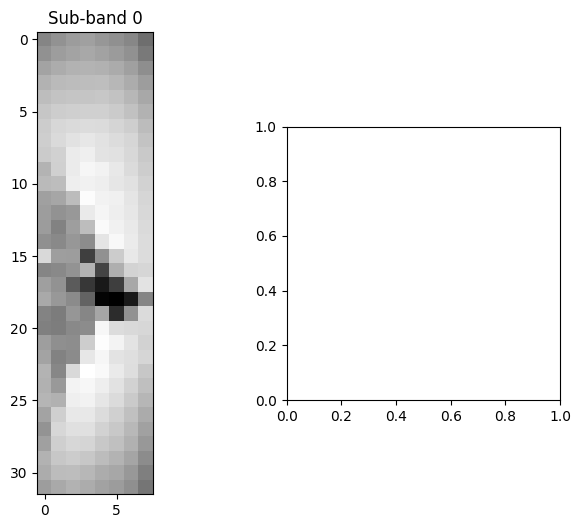